In [1]:
from helpers import * 
from processor import *
from four_complete import *
from graph_checks import *
from four_complete_coordinates import *
from four_complete_locations import *

In [2]:
bottom_data = get_saved_graph_data("BOTTOM")
side_data = get_saved_graph_data()

In [3]:
f = FourComplete(bottom_data)
f.get_boundary_cyle()
f.generate_dividing_indices()
f.divide_boundary_cycle()
f.ensure_no_cips()
f.paths

ic| cip: [0, 8, 3, 2], path: [0, 8, 3, 2], 'NEED to adjust division'
ic| i: 0
    self.paths: [[0, 8, 3, 2], [2, 7, 6, 5], [5, 4], [4, 0]]
    "found cips": 'found cips'


[[3, 2, 7, 6], [6, 5, 4, 0], [0, 8], [8, 3]]

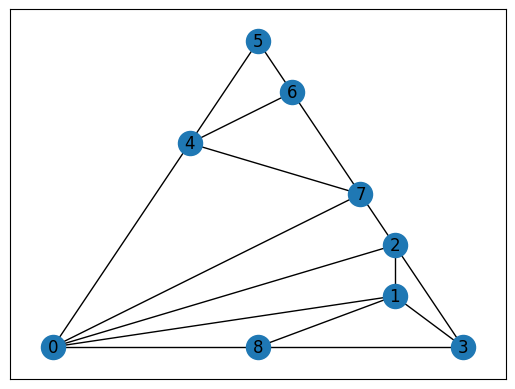

In [4]:
plot_planar(f.G, f.embed)

In [5]:
b = BoundaryCycle(bottom_data)

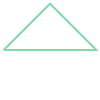

In [6]:
b.boundary_line_string

In [7]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [8]:
[c for c in b.boundary_line_string.coords]

[(-1.0, -0.3620689655172414),
 (-0.4482758620689655, 0.1896551724137931),
 (-0.1724137931034483, 0.46551724137931033),
 (-0.034482758620689655, 0.3275862068965517),
 (0.24137931034482757, 0.05172413793103448),
 (0.3793103448275862, -0.08620689655172414),
 (0.6551724137931034, -0.3620689655172414),
 (-0.1724137931034483, -0.3620689655172414),
 (-1.0, -0.3620689655172414)]

In [9]:
def points_to_plot(coords):
    x = [c[0] for c in coords]
    y  = [c[1] for c in coords]
    return x, y

In [10]:
coo = FourCompleteCoordinates(copy.deepcopy(bottom_data), f.paths[3], b.boundary_line_string)
coo.nodes

ic| 'slope is 0'
ic| 'flipped'
ic| 'slope is 0'


[(8, 3)]

In [11]:
c1 = FourCompleteCoordinates(copy.deepcopy(bottom_data), f.paths[1], b.boundary_line_string)

c0 = FourCompleteCoordinates(copy.deepcopy(bottom_data), f.paths[0], b.boundary_line_string)

In [12]:
c1.orthog_line.centroid.overlaps(b.boundary_line_string)

False

In [13]:
from shapely import Polygon

In [14]:
# c0.orthog_line.centroid.within(b.boundary_line_string)
Polygon(b.boundary_line_string).crosses(coo.orthog_line)

False

In [15]:
Polygon(b.boundary_line_string).contains(c1.orthog_line.centroid)

False

In [16]:
for c in coo.orthog_line.coords:
    ic((c))

ic| c: (0.24137931034482757, -0.3620689655172414)
ic| c: (-0.25862068965517243, -0.8620689655172413)


In [17]:
b.boundary_line_string.crosses(coo.orthog_line)

False

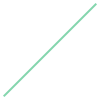

In [18]:
coo.orthog_line

ic| 'slope is 0'


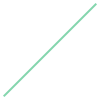

In [19]:
ll = line_from_point_and_slope(coo.midpoint, orthogonal_slope(coo.most_freq_slope))
ll

In [20]:
ll.crosses(coo.orthog_line)

False

In [21]:
bx, by = points_to_plot(b.boundary_line_string.coords)
cx, cy = points_to_plot(coo.orthog_line.coords)
lx, ly = points_to_plot(ll.coords)
# super quick scatter plot
fig = go.Figure()

fig.add_trace(go.Scatter(x=bx, y=by, mode='markers',))
fig.add_trace(go.Scatter(x=cx, y=cy, mode='markers',))
fig.add_trace(go.Scatter(x=lx, y=ly, mode='markers',))


fig.update_layout(xaxis_title='Dates',
                  yaxis_title='Temperature (ºC)',
                  title='All Data')

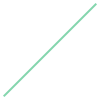

In [22]:
coo.orthog_line

## below is working

In [23]:
locs = FourCompleteLocations(copy.deepcopy(bottom_data), f.boundary, f.paths, b.boundary_line_string)
locs.run()

ic| 'slope is 0'
ic| 'flipped'
ic| 'slope is 0'
ic| 'slope is 0'
ic| 'flipped'
ic| 'slope is 0'
ic| 'Both coordinates are equidistant in the specified direction'
ic| 'When assigning corner node directions, had to reshuffle'


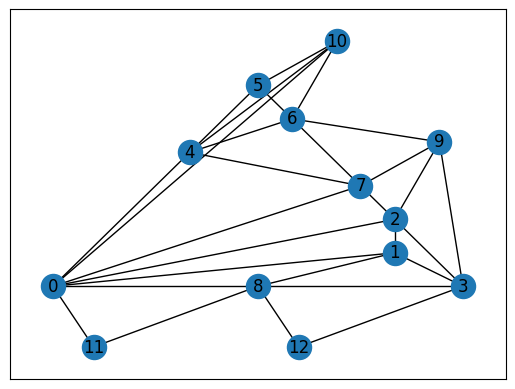

In [24]:
plot_planar(locs.G, locs.embed)

In [25]:
f.paths

[[3, 2, 7, 6], [6, 5, 4, 0], [0, 8], [8, 3]]